Interpola, mediante el interpolador de Lagrange (calculado usando las fórmulas de Lagrange y de Newton), los siguientes puntos $(x, y)$: $(0.1, 1)$, $(0.2, -4)$, $(0.4, 8)$, $(0.8, -16)$.

In [2]:
# Importamos al espacio de nombres una selección de funciones que nos será útil
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
# Datos a interpolar
x = [0.1, 0.2, 0.4, 0.8]
y = [1, -4, 8, -16]

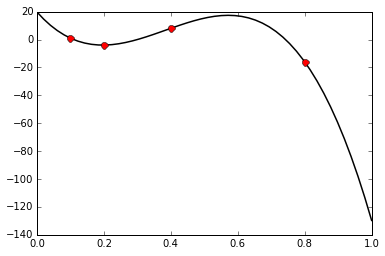

In [4]:
# Polinomio de interpolación según la función de la fórmula de Lagrange programada en Python
from scipy.interpolate import lagrange

p = lagrange(x, y)

rango_x = [0, 1]
X = linspace(*rango_x)

plot(X, p(X), color="black", linewidth=1.5)
plot(x, y, "o", color="red", markersize=7)

In [5]:
# Construimos nosotros una función que devuelva el interpolador de Lagrange usando la fórmula de Lagrange
from functools import reduce

# Funciones base de Lagrange
def funcion_base_lagrange(lista_x, punto):
    """Construye una función base de Lagrange a partir de una lista de valores de abscisa en la
    que se especifica una posición (un punto) concreta.
    
    Parámetros
    ----------
    lista_x : list[float]
        Lista de valores de abscisa.
    punto : int
        Posición de la lista que indica el punto en el que la función base vale 1.
    
    Retorno
    -------
    function
        Función base asociada a los valores de abscisa en lista_x, que alcanza el
        valor 1 en lista_x[punto] y 0 en los demás
    """
    # Este es el denominador de la función base, que es independiente del punto en el que evaluemos esta.
    denominador = reduce(lambda a, b: a*b, # Función producto
                         [(lista_x[punto]-lista_x[i]) for i in range(len(lista_x)) if i != punto]) # Lista con los factores del
                                                                                                   # denom. de la función base
    # Esta es la función base en sí:
    def func_base(u):
        # Este es el numerador de la función base, que hay que calcularlo según el punto de evaluación.
        numerador = reduce(lambda a, b: a*b, # Función producto
                           [(u-lista_x[i]) for i in range(len(lista_x)) if i != punto]) # Lista con los factores del numer. de
                                                                                        # la función base
        return numerador/denominador
    return func_base

In [6]:
# Polinomio interpolador de Lagrange mediante la fórmula de Lagrange
def interpolador_lagrange(lista_x, lista_y):
    """Construye el interpolador de Lagrange (empleando la fórmula de Lagrange) para un conjunto
    de punto cuyos valores de abscisa están dados en una lista y cuyos valores de ordenada están
    dados en otra.
    
    Parámetros
    ----------
    lista_x : list[float]
        Lista de valores de abscisa.
    lista_y : list[float]
        Lista de valores de ordenada.
    
    Retorno
    -------
    function
        Interpolador de Lagrange que pasa por los puntos (x, y) donde x pertenece a lista_x e y es el valor
        perteneciente a lista_y que está asociado a esa x.
    """
    funciones_base = [] # Lista con las funciones base. El elemento i es la función base asociada al punto x_i de lista_x
    
    # Construimos las funciones base para todos los puntos x_i
    for i in range(len(lista_x)):
        funciones_base.append(funcion_base_lagrange(lista_x, i))
    
    # Este es el interpolador en sí:
    @vectorize # Usamos la clase "vectorize" de numpy como decorador para vectorizar nuestra función
    def interp(u):
        return sum( [lista_y[i]*funciones_base[i](u) for i in range(len(lista_x))] ) # Calculamos los valores del interpolador
                                                                                     # usando las funciones base y los valores
                                                                                     # de ordenada
    return interp

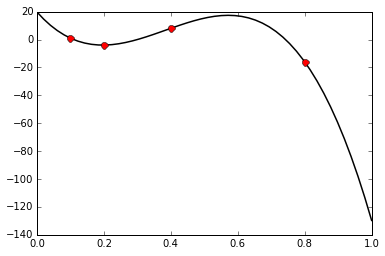

In [7]:
# Polinomio de interpolación según nuestra función de la fórmula de Lagrange
p = interpolador_lagrange(x, y)

plot(X, p(X), color="black", linewidth=1.5)
plot(x, y, "o", color="red", markersize=7)

In [8]:
# Ahora contruimos una función que devuelva el interpolador de Lagrange usando la fórmula de Newton

# Diferencias divididas
def dif_div(lista_x, lista_y, orden, pos):
    """Calcula, recursivamente, una diferencia dividida de un orden concreto dadas dos listas:
    una de valores de abscisa, y la otra de sus valores de ordenada asociados.
    
    Parámetros
    ----------
    lista_x : list[float]
        Lista de valores de abscisa.
    lista_y : list[float]
        Lista de valores de ordenada.
    orden : int
        Orden de la diferencia dividida.
    pos : int
        Valor que indica, una vez fijado el orden, qué diferencia dividida estamos calculando.
        
        Por ejemplo, si tenemos cuatro puntos (x_0, y_0), ..., (x_3, y_3), y fijamos orden 1
        (hay 3 diferencias divididas con ese orden), el valor pos=0 correspondería a la diferencia
        f[x_0, x_1], el valor pos=1 a f[x_1, x_2], y el valor pos=2 a f[x_2, x_3].
    
    Retorno
    -------
    float
        Diferencia dividida asociada a los puntos (x, y) determinados por lista_x y lista_y, de orden = orden
        y especificada por pos.
    """
    if orden == 0:
        return lista_y[pos]
    else:
        return (dif_div(lista_x, lista_y, orden-1, pos+1) - dif_div(lista_x, lista_y, orden-1, pos))/(x[pos+orden] - x[pos])

In [9]:
# Polinomio interpolador de Lagrange mediante la fórmula de Newton
def interpolador_newton(lista_x, lista_y):
    """Construye el interpolador de Lagrange (empleando la fórmula de Newton) para un conjunto
    de punto cuyos valores de abscisa están dados en una lista y cuyos valores de ordenada están
    dados en otra.
    
    Parámetros
    ----------
    lista_x : list[float]
        Lista de valores de abscisa.
    lista_y : list[float]
        Lista de valores de ordenada.
    
    Retorno
    -------
    function
        Interpolador de Lagrange que pasa por los puntos (x, y) donde x pertenece a lista_x e y es el valor
        perteneciente a lista_y que está asociado a esa x.
    """
    dif_divs = [dif_div(lista_x, lista_y, k, 0) for k in range(len(lista_x))] # Lista con las diferencias divididas
    
    # Este es el interpolador en sí
    @vectorize # Volvemos a usar "vectorize" para vectorizar nuestra función
    def interp(u):
        # Aplicamos la fórmula de Newton
        prods = [reduce(lambda x, y: x*y, [(u-x) for x in lista_x[0:k+1]]) for k in range(len(lista_x)-1)]
        return dif_divs[0] + sum([dif_divs[k+1]*prods[k] for k in range(len(lista_x)-1)])
    return interp

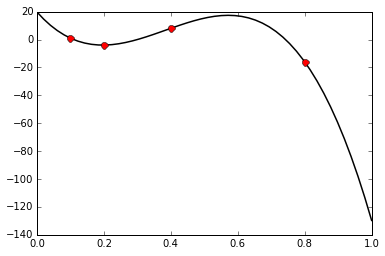

In [10]:
# Polinomio de interpolación según nuestra función de la fórmula de Newton
p = interpolador_newton(x, y)

plot(X, p(X), color="black", linewidth=1.5)
plot(x, y, "o", color="red", markersize=7)

In [1]:
__author__ = "Andoni Gutiérrez Martínez, J. Rafael Rodríguez Galván"
__license__ = "BSD"
__version__ = "0.1"